# Run the whole deltas algorithm

In [244]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pipeline
import deltas

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Get data

In [245]:
N1 = 10000
N2 = 10
data_clf = pipeline.get_data(
    m1=[-20, -20],
    m2=[20, 20],
    cov1=[[10, 0], [0, 10]],
    cov2=[[20, 0], [0, 20]],
    N1=N1,
    N2=N2,
    scale=True)


## Get Classifier

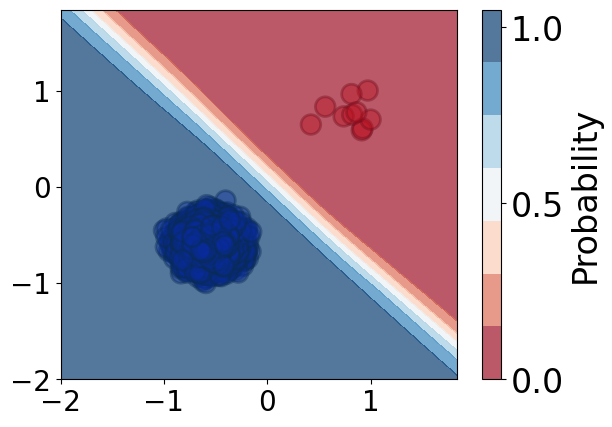

In [246]:
model = 'SVM'
model = 'Linear'
# model = 'MLP'
balance_clf = False

data_clf['clf'] = pipeline.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

In [247]:
clf = data_clf['clf']
clf.get_projection([[1, 1]]) #- clf.intercepts_[-1]

array([[3.57605953]])

## Get projection and data we need (R, D, M etc.)

R1 empirical: 1.0928842343390188
R2 empirical: 0.7670483740909657


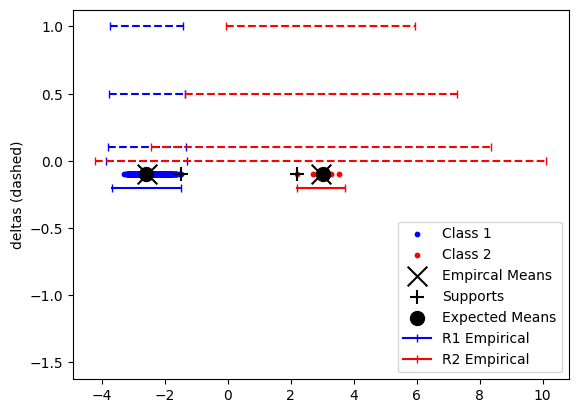

In [248]:
data_info = pipeline.data_project_and_info(
    data=data_clf['data'], m1=data_clf['mean1'], m2=data_clf['mean2'], clf=data_clf['clf'], data_test=data_clf['data_test'])

## set up extra parameters

In [249]:
# Costs
data_info['c1'] = 1
data_info['c2'] = 1
pipeline.print_params(data_info)

Parameters
        R:  3.5369200116492157
        N1: 10000
        N2: 10000
        R1: 1.0928842343390188
        R2: 0.7670483740909657
        M:  3.675795363420627
        D:  5.535727971850612
        C1: 1
        C2: 1


## Optimiser

deltas init: [1, 0.47326213832962355]
eq. 7 can be satisfied: True
constraint init: True
Grid Search Optimisation Complete
    delta1 : 0.005005005005006 
    delta2: 0.5339253909880073
    constraint satisfied: True


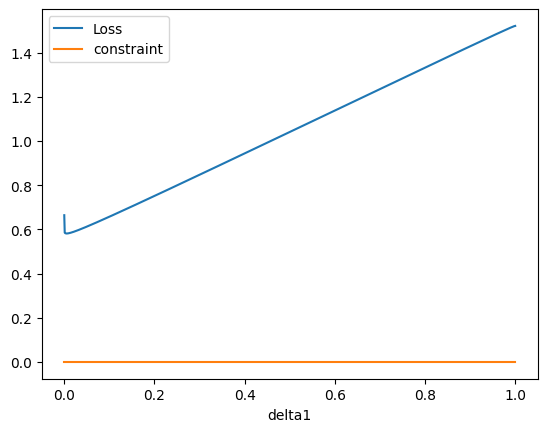

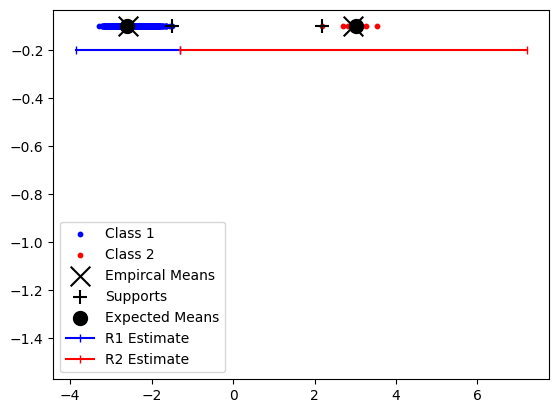

In [250]:

loss_func = deltas.scipy_optim_func   # returns tuple for (loss_func, gradient)
# loss_func only - won't use gradient during optimisation
loss_func = deltas.loss_one_delta

contraint_func = deltas.contraint_eq7
# contraint_func = deltas.contraint_eq8

delta1_from_delta2_func = deltas.delta2_given_delta1_matt

delta1, delta2 = pipeline.optimise(
    data_info, loss_func, contraint_func, delta1_from_delta2_func, grid_search=True)

# Evaluation on test data

original accuracy: 1.0
deltas   accuracy: 1.0


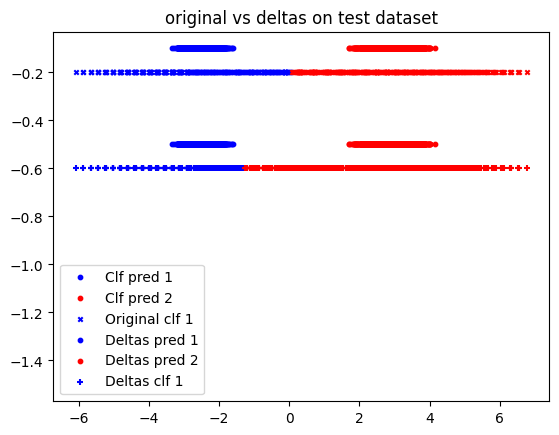

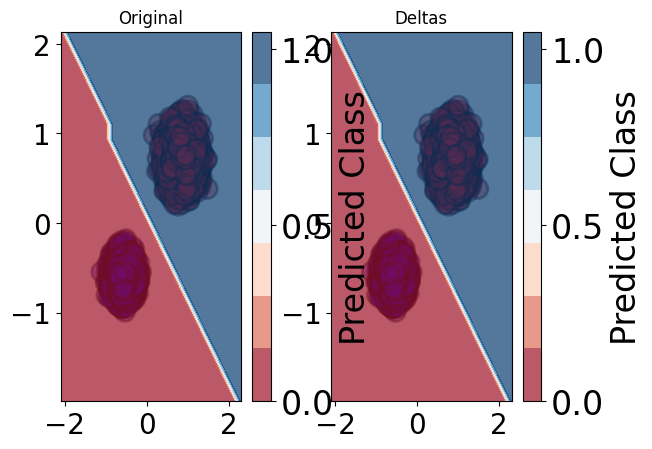

In [251]:
pipeline.eval_test(data_clf, data_info, delta1, delta2)